# Calculator Digits Templates
For our little project where we want to read the temperature out of Valliant thermostat we first try template matching. 

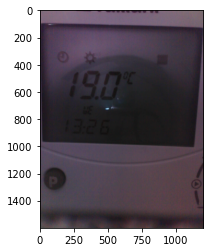

As you can see for need calculator digits templates to match them against the temperature. For this we use the following image: 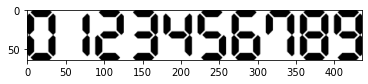

Our goal is to extract templates for each digit on this image of digits. Like the one bellow:

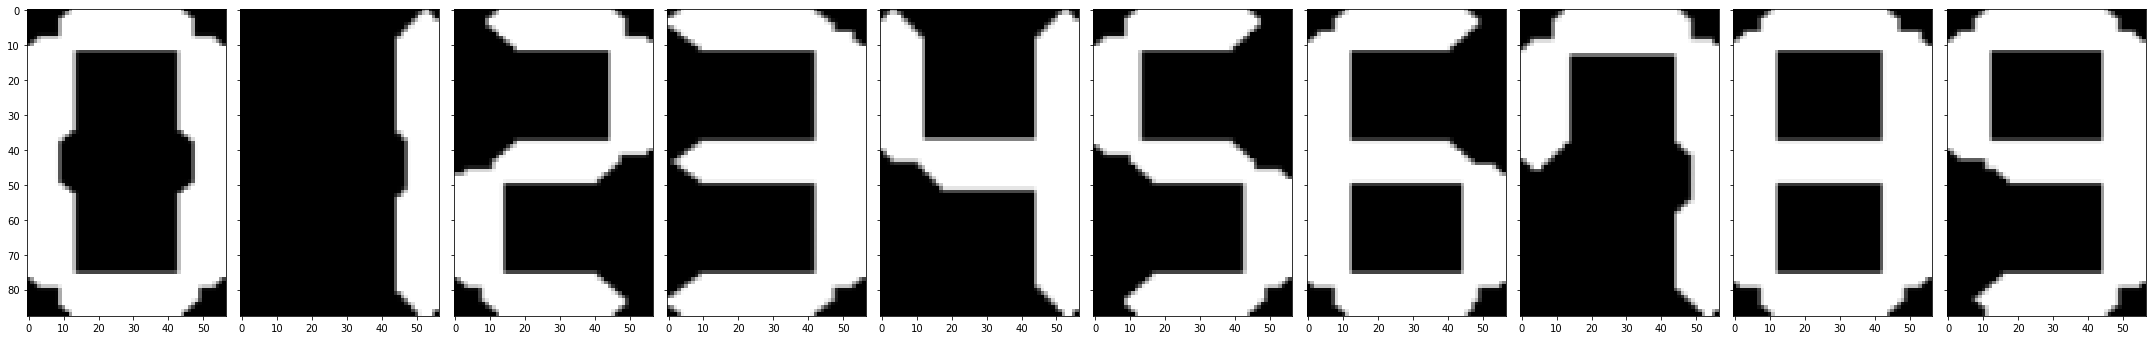

## Imports

In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt

from kluppspy.cv import utils as cvu
from kluppspy.devices import calculator as calc

## Image with Calculator Digits

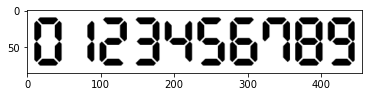

In [38]:
def get_digits_im():
    digits_path = '../images/fonts/calculator_numbers.png'
    im = cv2.imread(digits_path)
    im = cv2.copyMakeBorder(im, 10, 10, 10, 10, cv2.BORDER_CONSTANT, None, (255, 255, 255))
    im = cv2.cvtColor(im, cv2.COLOR_BGR2GRAY)
    return im

im = get_digits_im()
plt.imshow(im, cmap='gray')

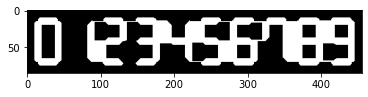

In [49]:
temperature = 255 - im
temperature = cvu.scale_im(temperature, height=85)
kernel = np.ones((15,15),np.uint8)
temperature = cv2.morphologyEx(temperature, cv2.MORPH_CLOSE, kernel)
_, temperature = cv2.threshold(temperature, 50, 255, cv2.THRESH_BINARY)
plt.imshow(temperature, cmap='gray')

## Preprocessing
Whenever we want to detect shapes we scale the image patch to has be 85 pixels in height. We also need the the objects we want to detect to be white on a dark background.

## Color Equalisation
We need to do color equalisation in case of unclear borders

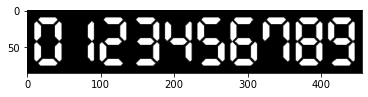

In [33]:
def equalize(im):
    clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=(3, 3))
    im = clahe.apply(im)
    im = cv2.equalizeHist(im)
    return im

plt.imshow(equalize(im), cmap='gray')

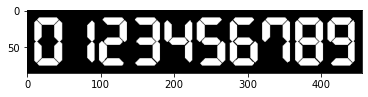

In [25]:
def prepare_shape_patch(im):
    im = cvu.scale_im(im, height=85)
    im = equalize(im)
    

plt.imshow(prepare_shape_patch(im), cmap='gray')

With doing the morphing we will close the gaps in the numbers themselfs. This will allow us to detect their contours as a single objects.

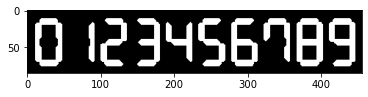

In [4]:
def close(im):
    im = get_digits_im()
    im = preprocess_black_text_on_white(im)
    kernel = np.ones((8,8),np.uint8)
    # font = cv2.morphologyEx(font, cv2.MORPH_TOPHAT, kernel)
    return cv2.morphologyEx(im, cv2.MORPH_CLOSE, kernel)

font_closed = get_digits_im_closed()
plt.imshow(font_closed, cmap='gray')

In [26]:
def extract_regions(im, kernel=None):
    kernel = np.ones((8,8),np.uint8)
    clahe = cv2.createCLAHE(clipLimit=2, tileGridSize=kernel.shape)
    im = clahe.apply(im)
    
    im = cv2.equalizeHist(im)

In [50]:
def extract_digits(im):
    font = cv2.threshold(im, 10, 255, cv2.THRESH_BINARY_INV)[1]
    kernel = np.ones((8,8),np.uint8)
    # font = cv2.morphologyEx(font, cv2.MORPH_TOPHAT, kernel)
    font = cv2.morphologyEx(font, cv2.MORPH_CLOSE, kernel)
    
    font_cnts, _ = cv2.findContours(font.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    font_cnts = sorted(font_cnts, key=lambda cnt: cnt[0, 0, 0], reverse = False)

    digits = {}
    for (i, c) in enumerate(font_cnts):
        # compute the bounding box for the digit, extract it, and resize
        # it to a fixed size
        (x, y, w, h) = cv2.boundingRect(c)
        roi = font[y:y + h, x:x + w]
#         roi = cv2.resize(roi, (57, 88))
        # update the digits dictionary, mapping the digit name to the ROI
        digits[i] = roi
        
    border = digits[0].shape[1] - digits[1].shape[1]
    digits[1] = cv2.copyMakeBorder(digits[1], 0, 0, border, 0, cv2.BORDER_CONSTANT, None, (0, 0, 0))
    new_digits = {}
    for i in range(len(digits)):
        digit = digits[i]
        kernel = np.ones((10,10),np.uint8)
#         font = cv2.morphologyEx(digit, cv2.MORPH_TOPHAT, kernel)
        font = cv2.morphologyEx(digit, cv2.MORPH_CLOSE, kernel)
        new_digits[i] = cv2.resize(digit, (57, 88))
    return new_digits




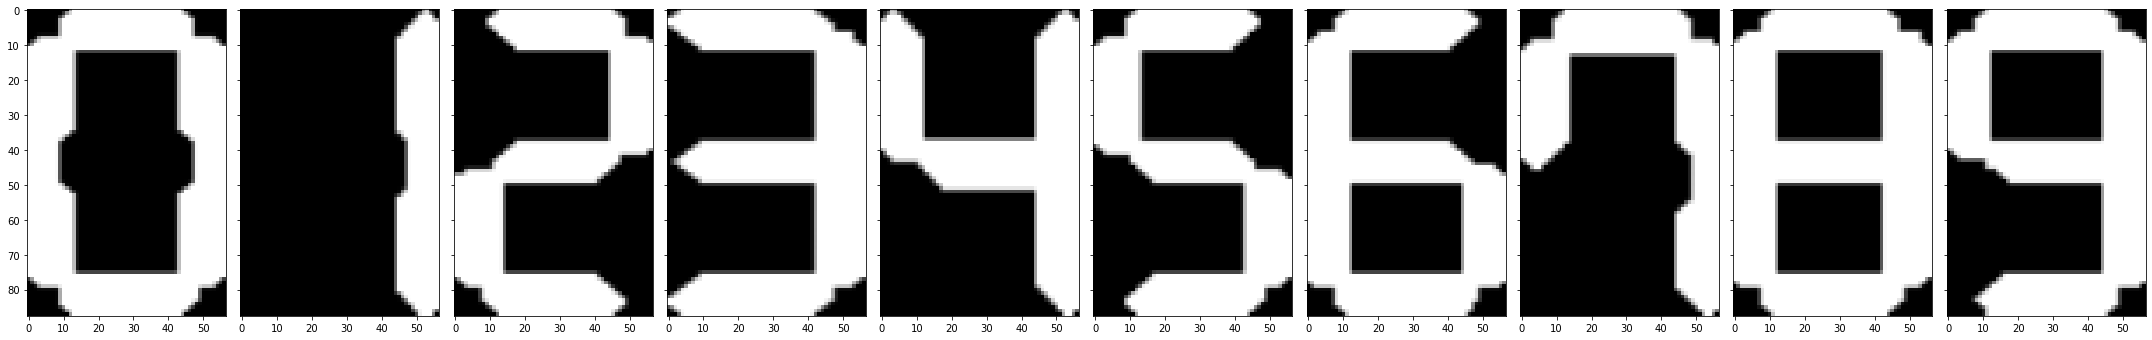

In [5]:
def extract_calculator_digits():
    im = get_digits_im()
    return extract_digits(im)
    
    
def show_calculator_digits():
    template_digits = calc.extract_digits()  
    f, axes = plt.subplots(1, 10, sharey=True, figsize=(30, 5))
    for idx, ax in enumerate(axes):
        ax.imshow(template_digits[idx], cmap='gray')
    plt.tight_layout()
    
show_calculator_digits()